In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
import os
import sys
import healpy as hp
import numpy as np

import pickle as pk
sys.path.append('../')

In [3]:
%load_ext autoreload
%autoreload 2
import libparam_cross as method

usage: ipykernel_launcher.py [-h] [-ivt] [-ivp] [-dd] [-delens] [-cl] [-lh]
                             inifile
ipykernel_launcher.py: error: unrecognized arguments: -f


Simulation uses /project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/LiteBird_s4mask/RS/Maps
Simulation uses /project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMBS4/RS/Maps
Delensing uses QE: p
Workspace intializing from /project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/litebird_cmbs4/RS/Pseudo/workspace/coupling_matrix.fits


Mean and STD of Bandpower: 100%|██████████| 100/100 [00:00<00:00, 851.92simulation/s]


The Variance of bias is not considered
returning cache
Bandpower calculated


Mean and STD of Bandpower: 100%|██████████| 100/100 [00:00<00:00, 1536.99simulation/s]


Fitting Delensed spectra between l=30 and l=150


Mean and STD of Bandpower: 100%|██████████| 100/100 [00:00<00:00, 5121.50simulation/s]


Likelihood: HL
delensed len:12


Covariance of delensed CMB spectra: 100%|██████████| 100/100 [00:00<00:00, 1390.24simulation/s]


[]

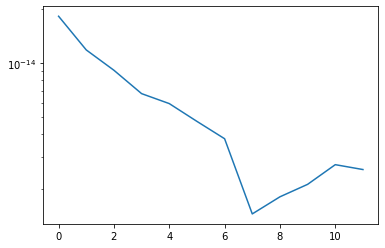

In [13]:
plt.plot(np.linalg.eigvals(method.cov_lib.delensed_fid_cov))
plt.semilogy()

[]

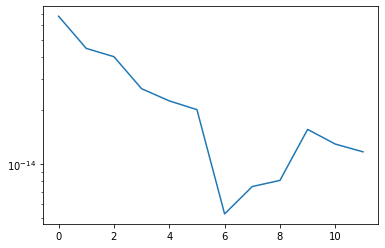

In [14]:
plt.plot(np.linalg.eigvals(method.cov_lib.lensed_fid_cov))
plt.semilogy()

In [6]:
np.linalg.det(method.cov_lib.lensed_fid_cov)

1.1069151908413102e-165

In [7]:
np.all(np.linalg.eigvals(method.cov_lib.lensed_fid_cov) > 0)

True

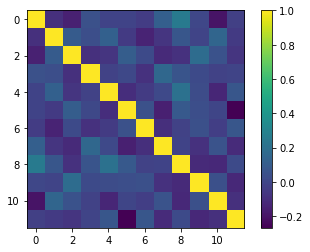

In [12]:
method.cov_lib.corr(method.cov_lib.lensed_fid_cov)

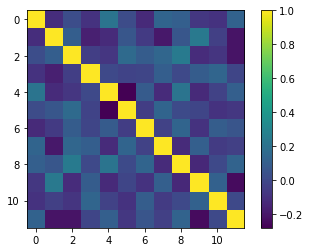

In [11]:
method.cov_lib.corr(method.cov_lib.delensed_fid_cov)

In [11]:
method.lh_lib.sigma_r(0)

'1.03e-03'

In [10]:
method.lh_lib.sigma_r(0)

'5.55e-04'

In [10]:
lb_m,lb_s = pk.load(open('s2s/lb.pkl','rb'))
s4_m,s4_s = pk.load(open('s2s/s4.pkl','rb'))
lb_s4_m,lb_s4_s = pk.load(open('s2s/lb_s4.pkl','rb'))

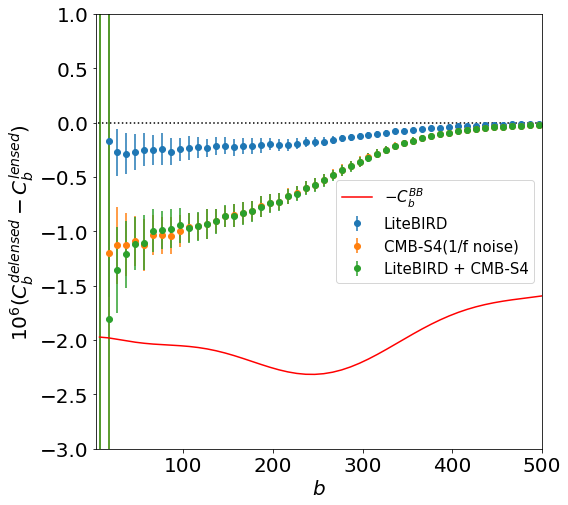

In [28]:
lmax=500
ymin=-3
ymax=1
ref = method.eff_lib.lib_pcl.b.bin_cell(method.eff_lib.fiducial[:method.eff_lib.lib_pcl.b.lmax+1])
plt.figure(figsize=(8,8))
plt.errorbar(method.eff_lib.lib_pcl.ell,lb_m*10**6, yerr=lb_s*10**6, fmt='o',label='LiteBIRD')
plt.errorbar(method.eff_lib.lib_pcl.ell,lb_s4_m*10**6, yerr=lb_s4_s*10**6, fmt='o',label='CMB-S4(1/f noise)')
plt.errorbar(method.eff_lib.lib_pcl.ell,s4_m*10**6, yerr=s4_s*10**6, fmt='o',label='LiteBIRD + CMB-S4')
plt.plot(method.eff_lib.lib_pcl.ell,-ref*10**6,label='$-C_b^{BB}$',c='r')
plt.plot(np.zeros(lmax+1), c='k',linestyle=':')
plt.ylim(ymin,ymax)
plt.xlim(2,lmax)
plt.legend(fontsize='15')
plt.xlabel('$b$',fontsize='20') 
plt.ylabel("$10^6(C_b^{delensed} - C_b^{lensed})$",fontsize='20')
plt.xticks(fontsize='20')
plt.yticks(fontsize='20')
plt.savefig('s2s/spectra_diff.pdf',bbox_inches='tight')